In [50]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from scipy import stats
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer,MaxAbsScaler

In [3]:
1. #Load the data
df = pd.read_csv('renttherunway.csv')
df.head()

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [4]:
2. #Check the first few samples, shape, info of the data and try to familiarize
#yourself with different features (2)
df.head(4)
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      192544 non-null  int64  
 1   fit             192544 non-null  object 
 2   user_id         192544 non-null  int64  
 3   bust size       174133 non-null  object 
 4   item_id         192544 non-null  int64  
 5   weight          162562 non-null  object 
 6   rating          192462 non-null  float64
 7   rented for      192534 non-null  object 
 8   review_text     192482 non-null  object 
 9   body type       177907 non-null  object 
 10  review_summary  192199 non-null  object 
 11  category        192544 non-null  object 
 12  height          191867 non-null  object 
 13  size            192544 non-null  int64  
 14  age             191584 non-null  float64
 15  review_date     192544 non-null  object 
dtypes: float64(2), int64(4), object(10)
memory usage: 23.5+ 

In [5]:
#There are 16 columns in the dataset and 192544 instances.
#We have around 10 object type variables, 2 float type and rest all interger datatype variables.


In [6]:
3. #Check if there are any duplicate records in the dataset? If any, drop them.(1)
len(df[df.duplicated()])

0

In [7]:
df['weight']

0         137lbs
1         132lbs
2            NaN
3         135lbs
4         145lbs
           ...  
192539    140lbs
192540    100lbs
192541    135lbs
192542    165lbs
192543    155lbs
Name: weight, Length: 192544, dtype: object

In [8]:
4. #Drop the columns which you think redundant for the analysis.(Hint: drop
#columns like ‘id’, ‘review’) (1)
df=df.drop(columns=['item_id','user_id','review_text','review_summary'],axis=1)

In [9]:
5. #Check the column 'weight', Is there any presence of string data? If yes, remove
#the string data and convert to float. (Hint: 'weight' has the suffix as lbs) (2)
            



5.0

In [10]:

# Step 1: Remove the 'lbs' suffix from the 'weight' column
df['weight'] = df['weight'].str.replace('lbs', '')

# Step 2: Convert the 'weight' column to float
df['weight'] = pd.to_numeric(df['weight'], errors='coerce', downcast='float')
df['weight']

0         137.0
1         132.0
2           NaN
3         135.0
4         145.0
          ...  
192539    140.0
192540    100.0
192541    135.0
192542    165.0
192543    155.0
Name: weight, Length: 192544, dtype: float32

In [11]:
6.#Check the unique categories for the column 'rented for' 
df['rented for'].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan, 'party: cocktail'], dtype=object)

In [12]:
# Group 'party: cocktail' with 'party'
df['rented for'] = df['rented for'].replace('party: cocktail', 'party')
df['rented for'].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan], dtype=object)

In [13]:
7.#The column 'height' is in feet with a quotation mark, Convert to inches with
#float datatype. (3)
df['height']

0         5' 8"
1         5' 6"
2         5' 4"
3         5' 5"
4         5' 9"
          ...  
192539    5' 9"
192540    5' 1"
192541    5' 8"
192542    5' 6"
192543    5' 6"
Name: height, Length: 192544, dtype: object

In [14]:
# Step 1: Extract feet and inches using a regular expression 
df[['feet', 'inches']] = df['height'].str.extract(r"(\d+)\'\s*(\d+)\"")
df['feet']

# Step 2: Fill missing (NaN) values with zeros
df[['feet', 'inches']] = df[['feet', 'inches']].fillna(0)

# Step 3: Convert feet and inches to total inches
df['height'] = df['feet'].astype(int) * 12 + df['inches'].astype(int)

# Step 4: Drop unnecessary columns
df.drop(['feet', 'inches'], axis=1, inplace=True)

# Step 5: Convert the 'height' column to float datatype
df['height'] = df['height'].astype(float)

print(df)






        Unnamed: 0  fit bust size  weight  rating     rented for  \
0                0  fit       34d   137.0    10.0       vacation   
1                1  fit       34b   132.0    10.0          other   
2                2  fit       NaN     NaN    10.0          party   
3                3  fit       34c   135.0     8.0  formal affair   
4                4  fit       34b   145.0    10.0        wedding   
...            ...  ...       ...     ...     ...            ...   
192539      192539  fit      34dd   140.0    10.0           work   
192540      192540  fit       32c   100.0    10.0           work   
192541      192541  fit       36a   135.0     6.0       everyday   
192542      192542  fit       36c   165.0    10.0        wedding   
192543      192543  fit       36b   155.0    10.0        wedding   

                body type  category  height  size    age         review_date  
0               hourglass    romper    68.0    14   28.0      April 20, 2016  
1       straight & narrow

In [15]:
8.#Check for missing values in each column of the dataset? If it exists, impute
#them with appropriate methods. (3)
df.isnull().sum()

Unnamed: 0         0
fit                0
bust size      18411
weight         29982
rating            82
rented for        10
body type      14637
category           0
height             0
size               0
age              960
review_date        0
dtype: int64

In [16]:
#imputing rating with median 
median_value = df['rating'].median()
df['rating'] = df['rating'].fillna(median_value)

In [17]:
#imputing bust size with a constant
constant_value = "Unknown"  
df['bust size'] = df['bust size'].fillna(constant_value)

In [18]:
#imputing weight with mean
mean_value = df['weight'].mean()
df['weight'] = df['weight'].fillna(mean_value)

In [19]:
#impute rented for with constant value
constant_value = "unknown"  
df['rented for'] = df['rented for'].fillna(constant_value)

In [20]:
#impute body type with constant value
constant_value = "unknown"  
df['body type'] = df['body type'].fillna(constant_value)

In [21]:
#impute age with mean
mean_age = df['age'].mean()
df['age'] = df['age'].fillna(mean_age)

In [22]:
df.isnull().sum()

Unnamed: 0     0
fit            0
bust size      0
weight         0
rating         0
rented for     0
body type      0
category       0
height         0
size           0
age            0
review_date    0
dtype: int64

In [23]:
9. #Check the statistical summary for the numerical values 
include = ['float', 'int']
df.describe(include=include)

,Unnamed: 0,weight,rating,height,size,age
count,192544.000000,192544.000000,192544.000000,192544.000000,192544.000000,192544.000000
mean,96271.500000,137.391708,9.092758,65.080984,12.245175,33.871017
std,55582.809453,20.126442,1.429862,4.691938,8.494877,8.037969
min,0.000000,50.000000,2.000000,0.000000,0.000000,0.000000
25%,48135.750000,125.000000,8.000000,63.000000,8.000000,29.000000
50%,96271.500000,137.391708,10.000000,65.000000,12.000000,32.000000
75%,144407.250000,145.000000,10.000000,67.000000,16.000000,37.000000
max,192543.000000,300.000000,10.000000,78.000000,58.000000,117.000000


In [24]:
#

In [25]:
#Checking statistical summary for the categorical columns
df['rented for'].describe()

count      192544
unique          9
top       wedding
freq        57784
Name: rented for, dtype: object

In [26]:
#We notice that there are 9 unique values for rented for column. 'Wedding' is the most occuring value.

In [27]:
df['body type'].describe()

count        192544
unique            8
top       hourglass
freq          55349
Name: body type, dtype: object

In [28]:
#We notice that there are 8 unique values for body type column. 'hourglass' is the most occuring value.

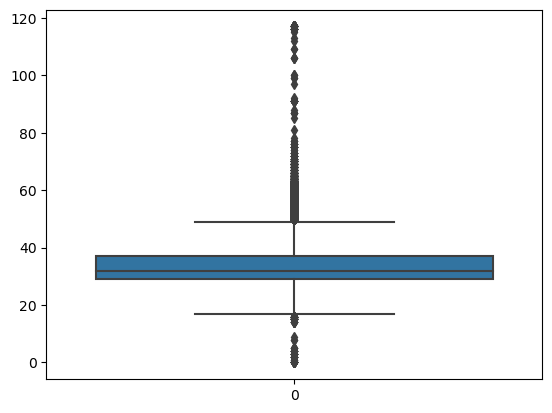

In [29]:
#10. Are there outliers present in the column age? If yes, treat them with the
#appropriate method. (3)
sns.boxplot(df['age'])
plt.show()

In [30]:
df['age_trans']=np.log(df['age'])

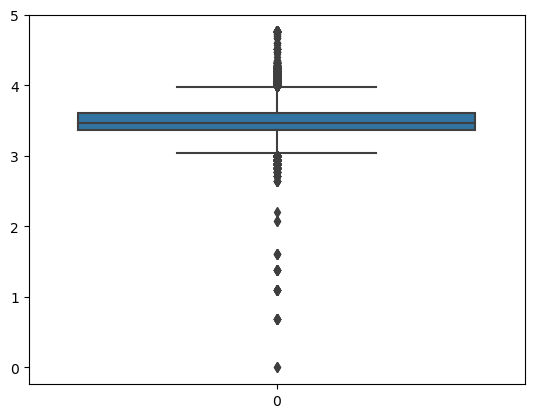

In [31]:
sns.boxplot(df['age_trans'])
plt.show()

In [32]:
#Dropping age_trans
df = df.drop(['age_trans'], axis = 1)

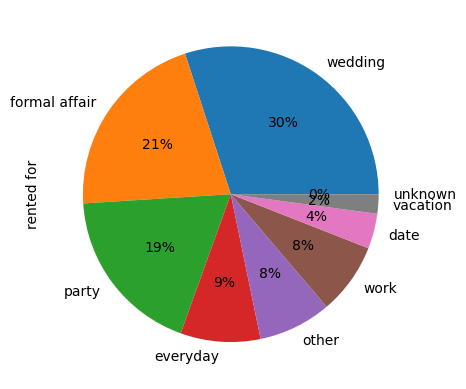

In [33]:
#Check the distribution of the different categories in the column 'rented for'
#using appropriate plot. (2)
df['rented for'].value_counts().plot(kind='pie',autopct='%1.0f%%')
plt.show()

In [34]:
#12. Encode the categorical variables in the dataset. (1)

cate = ['rented for','body type']
lbl_encode = LabelEncoder()
for i in cate:
    df[i] = df[[i]].apply(lbl_encode.fit_transform)

In [35]:
#13. Standardize the data, so that the values are within a particular range. (1)
##dropping string data
dff_final = df.drop(['category','bust size','fit','review_date'], axis = 1)
dff_final.head()

,Unnamed: 0,weight,rating,rented for,body type,height,size,age
0,0,137.000000,10.0,6,3,68.0,14,28.0
1,1,132.000000,10.0,3,6,66.0,12,36.0
2,2,137.391708,10.0,4,7,64.0,4,116.0
3,3,135.000000,8.0,2,4,65.0,8,34.0
4,4,145.000000,10.0,7,1,69.0,12,27.0


In [36]:
dff_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  192544 non-null  int64  
 1   weight      192544 non-null  float32
 2   rating      192544 non-null  float64
 3   rented for  192544 non-null  int32  
 4   body type   192544 non-null  int32  
 5   height      192544 non-null  float64
 6   size        192544 non-null  int64  
 7   age         192544 non-null  float64
dtypes: float32(1), float64(3), int32(2), int64(2)
memory usage: 9.5 MB


In [37]:
dff_final['rented for'].unique()

array([6, 3, 4, 2, 7, 0, 1, 8, 5])

In [38]:
# Standardizing the data

sc = StandardScaler()# create an  object

df_scaled3 = dff_final.copy()

df_scaled3.iloc[:,:8] = sc.fit_transform(df_scaled3.iloc[:,:8])
df_scaled3.head()

,Unnamed: 0,weight,rating,rented for,body type,height,size,age
0,-1.732042,-1.946600e-02,0.634498,0.664564,-0.142497,0.622136,0.206575,-0.730412
1,-1.732024,-2.679414e-01,0.634498,-0.536429,1.434341,0.195872,-0.028862,0.264866
2,-1.732006,-2.666196e-08,0.634498,-0.136098,1.959954,-0.230392,-0.970608,10.217655
3,-1.731988,-1.188562e-01,-0.764242,-0.936760,0.383116,-0.017260,-0.499735,0.016047
4,-1.731970,3.780946e-01,0.634498,1.064895,-1.193723,0.835268,-0.028862,-0.854822


In [39]:
#14. Apply PCA on the above dataset and determine the number of PCA
#components to be used so that 90-95% of the variance in data is explained by
#the same. (7)
cov_matrix = np.cov(df_scaled3.T)
cov_matrix

array([[ 1.00000519e+00,  4.27830898e-04, -2.79599879e-03,
        -9.12277777e-05,  1.97637599e-03,  2.95003704e-03,
         7.71673203e-04,  5.40105901e-04],
       [ 4.27830898e-04,  1.00000519e+00, -2.07327771e-02,
         9.01576992e-03, -1.93136958e-01,  1.99162415e-01,
         7.32740550e-01,  6.12871101e-02],
       [-2.79599879e-03, -2.07327771e-02,  1.00000519e+00,
         1.28198258e-02,  1.77133624e-02,  4.20104935e-03,
        -3.67286881e-02, -3.51011698e-02],
       [-9.12277777e-05,  9.01576992e-03,  1.28198258e-02,
         1.00000519e+00,  4.19092672e-03, -1.33535878e-02,
         3.27664525e-03, -4.08267363e-02],
       [ 1.97637599e-03, -1.93136958e-01,  1.77133624e-02,
         4.19092672e-03,  1.00000519e+00, -6.91277482e-02,
        -1.71640765e-01, -5.58346920e-02],
       [ 2.95003704e-03,  1.99162415e-01,  4.20104935e-03,
        -1.33535878e-02, -6.91277482e-02,  1.00000519e+00,
         1.25981229e-01,  4.43769733e-03],
       [ 7.71673203e-04,  7.327405

In [40]:
eig_vals,eig_vectors=np.linalg.eig(cov_matrix)
print('eigen vals','\n',eig_vals)
print('\n')
print('eigen vectors','\n',eig_vectors)

eigen vals 
 [1.91003427 0.25720975 1.05383899 0.89857924 0.91788305 0.9671242
 1.00040205 0.99496998]


eigen vectors 
 [[-1.29670566e-03  4.28147693e-04 -1.64339562e-02 -2.15983071e-02
  -2.80437246e-02 -9.04185301e-02  9.92524159e-01  7.20791686e-02]
 [-6.43039775e-01  7.06017756e-01  1.19119578e-01 -2.00886889e-01
   1.81675531e-01  3.84636853e-03  3.49861975e-03 -2.14645523e-02]
 [ 5.16152512e-02 -1.07382509e-02  5.07734634e-01 -4.73456047e-04
  -3.02994221e-02 -6.69163939e-01 -9.19318166e-02  5.31296511e-01]
 [ 4.85103156e-03 -1.76607504e-03  5.40789116e-01  3.39897420e-01
  -3.96692615e-02 -1.85479444e-01  5.23578675e-02 -7.43822965e-01]
 [ 2.87675636e-01  2.26656940e-02  4.78355517e-02  5.03192003e-02
   9.54301170e-01  1.61294090e-02  3.01921500e-02  6.80337490e-03]
 [-2.51657354e-01 -6.92002123e-02  2.57033863e-01  6.97586351e-01
   1.59003279e-02  4.77700810e-01  3.50243832e-02  3.86664184e-01]
 [-6.38498796e-01 -6.98673592e-01  9.87817727e-03 -1.99636384e-01
   2.21364746e-

In [41]:
total = sum(eig_vals)
var_exp = [(i/total)*100 for i  in sorted(eig_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Explained Variance: ',var_exp)
print('Cumulative variance explained: ',cum_var_exp)

Explained Variance:  [23.87530443058751, 13.17291896221318, 12.50496067473412, 12.437060179179438, 12.088989776480197, 11.4734785823087, 11.232182205002058, 3.215105189494801]
Cumulative variance explained:  [ 23.87530443  37.04822339  49.55318407  61.99024425  74.07923402
  85.55271261  96.78489481 100.        ]


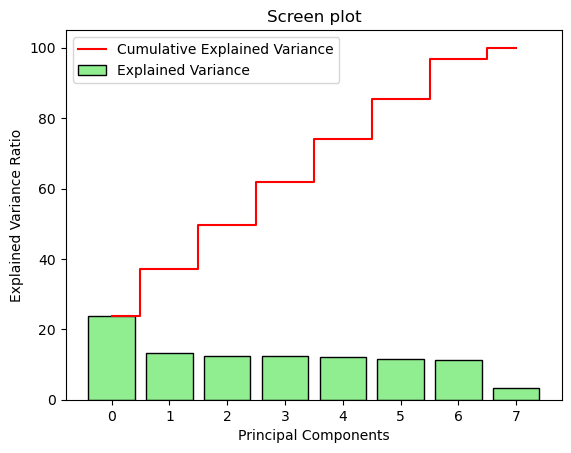

In [42]:
plt.bar(range(8),var_exp,align='center',color = 'lightgreen',edgecolor='black',label='Explained Variance')
plt.step(range(8),cum_var_exp,where='mid',color='red',label='Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Screen plot')
plt.legend(loc='best')
plt.show()


In [43]:
#15. Apply K-means clustering and segment the data. (You may use original
#data or PCA transformed data) (8)
pca = PCA(n_components=8)

pca_df = pd.DataFrame(pca.fit_transform(df_scaled3),columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0.152121,-1.305217,1.696903,0.012383,-0.263700,-0.125763,-0.242781,0.278302
1,-0.540543,0.013141,1.766625,-0.688359,0.187943,1.383731,-0.271747,0.133008
2,0.495083,5.886598,2.133398,0.319019,5.548386,2.313974,-5.853835,-1.643549
3,-0.465540,0.881082,1.686867,-0.200316,-0.880241,0.342990,0.140752,-0.285667
4,0.589986,-1.646590,1.693366,0.218385,-0.363899,-1.128972,-0.371985,-0.116484


In [57]:
cluster_range = range(1,8)
cluster_errors = []

for num_clusters in cluster_range:
   
    clusters = KMeans(num_clusters, n_init=10)
    clusters.fit(pca_df)
    
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({'num_clusters':cluster_range, 
                           'cluster_errors':cluster_errors})

clusters_df

,num_clusters,cluster_errors
0,1,1.540352e+06
1,2,1.322291e+06
2,3,1.205067e+06
3,4,1.091112e+06
4,5,9.873651e+05
5,6,9.073437e+05
6,7,8.384227e+05


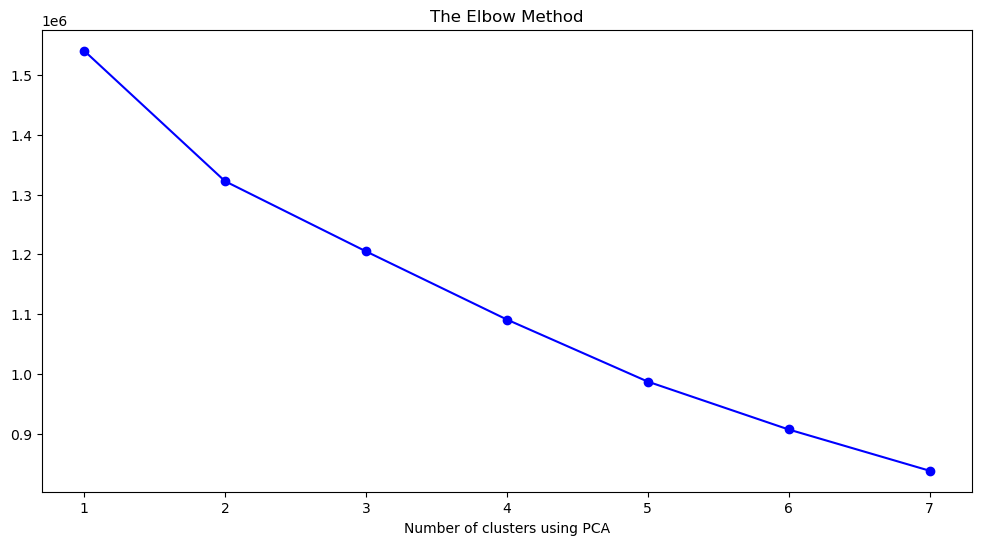

In [58]:
## Elbow method
plt.figure(figsize=[12,6])
plt.title('The Elbow Method')
plt.xlabel('Number of clusters using PCA')
plt.plot(clusters_df['num_clusters'],clusters_df['cluster_errors'],marker='o',color='b')
plt.show()

In [59]:
## Fit the KMeans clustering model using the obtained optimal K
kmeans = KMeans(n_clusters=6, n_init=15, random_state=2345)
kmeans.fit(pca_df)

KMeans(n_clusters=6, n_init=15, random_state=2345)

In [60]:
kmeans.labels_

array([2, 4, 4, ..., 1, 2, 2])

In [61]:
## Creating a new dataframe only for labels.
df_labels = pd.DataFrame(kmeans.labels_, columns=list(['Labels']))
df_labels.head(5)

,Labels
0,2
1,4
2,4
3,0
4,2


In [62]:
from sklearn.metrics import silhouette_score

kmeans_score = []

for i in range(2,5):
    kmeans = KMeans(n_clusters=i)
    kmeans = kmeans.fit(pca_df)
    labels = kmeans.predict(pca_df)
    print(i, (pca_df,labels))

2 0.14729967705415822
3 0.12785872454934766
4 0.12280167990729339


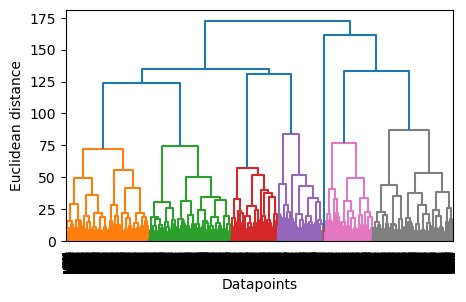

In [71]:
#16. Apply Agglomerative clustering and segment the data. (You may use
# original data or PCA transformed data) (8)
rows = pca_df.sample(frac =.10)
plt.figure(figsize=[5,3])
merg = linkage(rows, method='ward')
dendrogram(merg, leaf_rotation=90,)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean distance')
plt.show()

In [77]:
## Building hierarchical clustering model using the optimal clusters as 4
hie_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean',
                                     linkage='ward')
hie_cluster_model = hie_cluster.fit(rows)

In [78]:
df_label1 = pd.DataFrame(hie_cluster_model.labels_,columns=['Labels'])
df_label1.head(5)

,Labels
0,3
1,1
2,0
3,1
4,3


In [79]:
df_hier = df.join(df_label1)
df_hier.head()

,Unnamed: 0,fit,bust size,weight,rating,rented for,body type,category,height,size,age,review_date,Labels
0,0,fit,34d,137.000000,10.0,6,3,romper,68.0,14,28.0,"April 20, 2016",3.0
1,1,fit,34b,132.000000,10.0,3,6,gown,66.0,12,36.0,"June 18, 2013",1.0
2,2,fit,Unknown,137.391708,10.0,4,7,sheath,64.0,4,116.0,"December 14, 2015",0.0
3,3,fit,34c,135.000000,8.0,2,4,dress,65.0,8,34.0,"February 12, 2014",1.0
4,4,fit,34b,145.000000,10.0,7,1,gown,69.0,12,27.0,"September 26, 2016",3.0
